# ENTREGABLE 5

## INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [2]:
!pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------- ------------------------- 20.5/57.6 kB ? eta -:--:--
     -------------- ------------------------- 20.5/57.6 kB ? eta -:--:--
     -------------- ------------------------- 20.5/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 245.8 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 245.8 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 245.8 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 245.8 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 131.8 kB/s eta 0:00:00
   ----------

In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia = Y_train[i] - prediction
                error = diferencia ** 2
                train_error_acum += error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weighted_sum = np.dot(inputs, self.weights) + self.bias
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_by_epoch.append(train_error_acum / X_train.shape[0])


            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)


                diferencia = Y_validation[i] - prediction
                error = diferencia ** 2
                train_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_by_epoch.append(val_error_acum / X_validation.shape[0])

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_by_epoch[-1], '| val error:', val_error_by_epoch[-1])
        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()



In [5]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000
N_inputs = 2
train_size = 0.8
N_train = int(train_size * N_samples)
N_validation = N_samples - N_train

# Generar datos de entrada y salida para la puerta AND
def generar_datos(num_muestras):
    # Generar num_muestras pares de entradas (x1, x2) donde cada x es 0 o 1
    X = np.random.randint(2, size=(num_muestras, 2))
    # Generar la salida y correspondiente usando la operación AND
    y = np.logical_and(X[:, 0], X[:, 1]).astype(int)
    return X, y

# Generar datos de entrenamiento
X_data, Y_data = generar_datos(N_samples)
X_train, Y_train = X_data[:N_train], Y_data[:N_train]
X_validation, Y_validation = X_data[N_train:], Y_data[N_train:]

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])


X_data (first 5 samples):
[[0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]]
Y_data (first 5 samples):
[0 0 0 1 0]


In [6]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [7]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 1]
Probabilidad: 0.4955342823954061
Prediction: 0


In [8]:
# Obtenemos un overview de como funciona el modelo sin entrenar de forma aleatoria
predictions = []

## itera por cada muestra de validación y genera la matriz de confusion
for inputs in X_validation:
    prob = perceptron_and.predict(inputs)
    prediction = (prob > th).astype('int')
    predictions.append(prediction)
    
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[485 253]
 [262   0]]


epoch: 0 | train error: 0.051103394210586475 | val error: 0.0
epoch: 10 | train error: 0.00011991252704665897 | val error: 0.0
epoch: 20 | train error: 3.14248595112718e-05 | val error: 0.0
epoch: 30 | train error: 1.4172354327480018e-05 | val error: 0.0
epoch: 40 | train error: 8.027099266719815e-06 | val error: 0.0
epoch: 50 | train error: 5.157611649936947e-06 | val error: 0.0
epoch: 60 | train error: 3.590695721802159e-06 | val error: 0.0
epoch: 70 | train error: 2.642630671856601e-06 | val error: 0.0
epoch: 80 | train error: 2.0258035948796342e-06 | val error: 0.0
epoch: 90 | train error: 1.6021495535793415e-06 | val error: 0.0


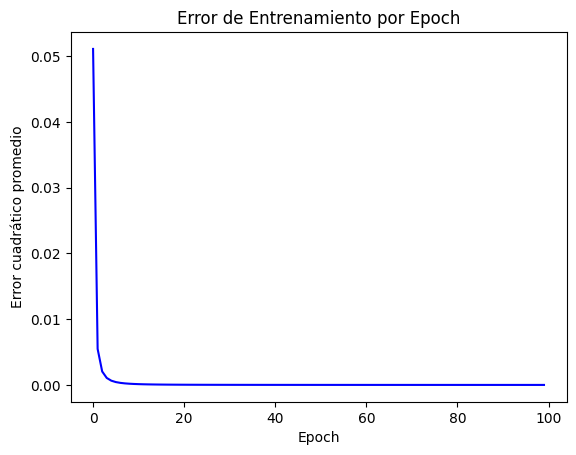

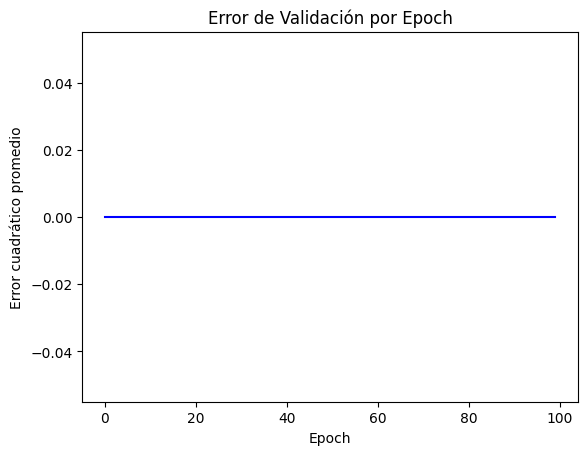

In [9]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [10]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 1]
Probabilidad: 0.001021536996886459
Prediction: 0


In [12]:
# Evaluamos cómo funciona el modelo en el set de validación
predictions = []

## itera por cada muestra de validación guardando las predicciones en una lista y genera la matriz de confusion
for inputs in X_validation:
    prob = perceptron_and.predict(inputs)
    prediction = (prob > th).astype('int')
    predictions.append(prediction)
    
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[738   0]
 [  0 262]]


In [14]:
# Evaluamos cómo funciona el modelo en el set de test

## Generar el set de test (de forma similar al de validación)
X_test, Y_test = generar_datos(500) 

## itera por cada muestra de test guardando las predicciones en una lista y genera la matriz de confusion
predictions = []

for inputs in X_test:
    prob = perceptron_and.predict(inputs)
    prediction = (prob > th).astype('int')
    predictions.append(prediction)

## Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predictions)

## Visualiza la matriz de confusión
print("Matriz de Confusión (test):")
print(conf_matrix)

Matriz de Confusión (test):
[[367   0]
 [  0 133]]
